In [ ]:
### upset
import pandas as pd 
import matplotlib 
import upsetplot as ups
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

df = pd.read_csv("/home/mouren/Data/interaction/bilan_all_interactions.csv", sep="\t", header=0,index_col=0)

result_list = [["pCap-HiC", "ENCODE-rE2G", "GTEx eQTLs"]]
for col in df.columns:
    for val in df[col]:
        if val != "0,0,0":
            split_list = [int(x) for x in val.split(",")]
            result_list.append(split_list)

df_res = pd.DataFrame(result_list)

df_res.columns = df_res.iloc[0]  # Set the first row as the header
df_res = df_res[1:].reset_index(drop=True) 

df_res = df_res.replace({0: False, 1: True})

plt.figure(figsize=(8,5))

up =  ups.UpSet(ups.from_indicators(lambda el: el.select_dtypes(bool),data=df_res),show_counts=True).plot()
ax = plt.gca()

for ax in plt.gcf().axes:
    ax.xaxis.grid(False)  # Turn off all grid lines

plt.title("Genes that has an interaction with an EE")
plt.savefig("/home/mouren/Images/tls1/interactions/genes_interacting_with_exons.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
###BAR
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib.patches import Patch

### Get dictionnary of transcript and genes
dic_gene={}
with open("/home/mouren/Data/final_files_tokeep/notes/list_transript_gene_id_gencodeV41_all_proteincoding.tsv") as file:
    for line in file:           
        dic_gene[line.strip().split()[0]] = line.strip().split()[1].split('.')[0]

## ee
dic_ee = {}
with open("/home/mouren/Data/interaction/robust_associations_exons_genes.txt") as file:
    for line in file:
        if line.strip().split()[0] not in dic_ee:
            dic_ee[line.strip().split()[0]] = [0,0]

        transcript = line.strip().split()[0].split("_")[0]
        gene_ee = dic_gene[transcript]

        if gene_ee == line.strip().split()[1]:
            dic_ee[line.strip().split()[0]][0] = 1
        else:
            dic_ee[line.strip().split()[0]][1] = 1

res_ee = [0,0,0]
for key,value in dic_ee.items():
    if value[0] == 1 and value[1] == 1: #mixed
        res_ee[2] += 1
    elif value[0] == 1 and value[1] == 0: #intern
        res_ee[0] += 1
    else: #extern
        res_ee[1] += 1

##neg
dic_neg = {}
with open("/home/mouren/Data/interaction/control/robust_associations_ctrlneg_genes.txt") as file:
    for line in file:
        if line.strip().split()[0] not in dic_neg:
            dic_neg[line.strip().split()[0]] = [0,0]

        transcript = line.strip().split()[0].split("_")[0]
        gene_ee = dic_gene[transcript]

        if gene_ee == line.strip().split()[1]:
            dic_neg[line.strip().split()[0]][0] = 1
        else:
            dic_neg[line.strip().split()[0]][1] = 1

res_neg = [0,0,0]
for key,value in dic_neg.items():
    if value[0] == 1 and value[1] == 1: #mixed
        res_neg[2] += 1
    elif value[0] == 1 and value[1] == 0: #intern
        res_neg[0] += 1
    else: #extern
        res_neg[1] += 1

### pos 
#awk '{print $1}' robust_associations_ctrlpos_genes.txt |sort -u |wc -l 
## 140491

In [ ]:
res_dic_ee = {}
res_dic_ee["Ctrl pos"] = [(140491*100)/404325,0,0]

res_dic_ee["Ctrl neg"] = [(res_neg[0]*100)/13253,(res_neg[1]*100)/13253,(res_neg[2]*100)/13253]

res_dic_ee["E.E"] = [(res_ee[0]*100)/13481,(res_ee[1]*100)/13481,(res_ee[2]*100)/13481]

print(sum((res_dic_ee["Ctrl pos"])))
print(sum((res_dic_ee["Ctrl neg"])))
print(sum((res_dic_ee["E.E"])))

34.74704754838311
2.3994567267788427
26.27401528076552


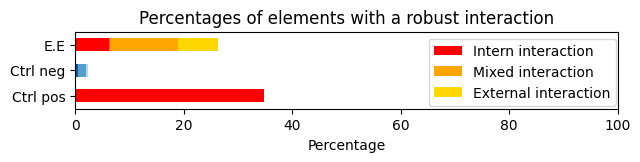

In [4]:
res_dic_ee = {}
res_dic_ee["Ctrl pos"] = [(140491*100)/404325,0,0]

res_dic_ee["Ctrl neg"] = [(res_neg[0]*100)/13253,(res_neg[1]*100)/13253,(res_neg[2]*100)/13253]

res_dic_ee["E.E"] = [(res_ee[0]*100)/13481,(res_ee[1]*100)/13481,(res_ee[2]*100)/13481]


cell_names = list(res_dic_ee.keys())
bar_positions = range(len(cell_names))

plt.figure(figsize=(7, 1))

red_values = [values[0] for values in res_dic_ee.values()]
gold_values = [values[1] for values in res_dic_ee.values()]
orange_values = [values[2] for values in res_dic_ee.values()]

# Define the new colors for the 'EE' bar
original_color_for_intern_ctrl = sns.color_palette("Blues")[5]
original_color_for_mixed_ctrl = sns.color_palette("Blues")[3]
original_color_for_external_ctrl = sns.color_palette("Blues")[1]  

# Define the original colors for the 'Ctrl-' bar
new_color_for_intern_ee = 'red'
new_color_for_mixed_ee = 'orange'
new_color_for_external_ee = 'gold'

colors_for_intern = [original_color_for_intern_ctrl if i == 1 else new_color_for_intern_ee for i in bar_positions]
colors_for_mixed = [original_color_for_mixed_ctrl if i == 1 else new_color_for_mixed_ee for i in bar_positions]
colors_for_external = [original_color_for_external_ctrl if i == 1 else new_color_for_external_ee for i in bar_positions]

# Plot each segment with its corresponding color
plt.barh(bar_positions, red_values, color=colors_for_intern, height=0.5)
plt.barh(bar_positions, gold_values, color=colors_for_mixed, left=red_values, height=0.5)
plt.barh(bar_positions, orange_values, color=colors_for_external, left=[r + y for r, y in zip(red_values, gold_values)], height=0.5)

plt.yticks(bar_positions, cell_names) #, size=5)

plt.xlabel('Percentage')
plt.xlim(0, 100)

c1 = Patch(facecolor="red", label='Intern interaction')
c2 = Patch(facecolor="orange", label='Mixed interaction')
c3 = Patch(facecolor="gold", label='External interaction')

plt.legend(handles=[c1,c2,c3],bbox_to_anchor=(1.01, 1))
plt.margins(x=100,y=0.1)
plt.title('Percentages of elements with a robust interaction')
plt.savefig("/home/mouren/Images/tls1/interactions/horizontal_barplot_interactions_robust.pdf", format="pdf", bbox_inches="tight")

plt.show()